In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import requests
import os
import json
import pprint
import requests.exceptions
import datetime
import matplotlib.pyplot as plt

In [3]:
# Name: Qais Yousef

In [17]:
    stock = str(input())

    apikey="crET8qUofRh2JUJSldzQ6bXtjuY0bxP1RdGppzni"
    headers = {
    'x-api-key': apikey
    }
    querystring = {"symbols":stock}    

    url   = "https://yfapi.net/v6/finance/quote"
    url_2 = "https://yfapi.net/v6/finance/quote?region=US&lang=en&symbols="+stock
    url_3 = "https://yfapi.net/v11/finance/quoteSummary/" + stock + "?lang=en&region=US&modules=defaultKeyStatistics%2CassetProfile"
    url_4 = "https://yfapi.net/ws/insights/v1/finance/insights?symbol="+stock 
    url_5 = "https://yfapi.net/v11/finance/quoteSummary/" + stock + "?lang=en&region=US&modules=balanceSheetHistory"
    url_6 = "https://yfapi.net/v11/finance/quoteSummary/" + stock + "?lang=en&region=US&modules=incomeStatementHistory"
    url_7 = "https://yfapi.net/v8/finance/chart/" + stock + "?range=5d&region=US&interval=1d&lang=en&events=div%2Csplit"

    
    response1 = requests.request("GET", url, headers=headers, params=querystring)
    response2 = requests.request("GET", url_2, headers=headers, params=querystring)
    response3 = requests.request("GET", url_3, headers=headers, params=querystring)
    response4 = requests.request("GET", url_4, headers=headers, params=querystring)
    response5 = requests.request("GET", url_5, headers=headers, params=querystring)
    response6 = requests.request("GET", url_6, headers=headers, params=querystring)
    response7 = requests.request("GET", url_7, headers=headers, params=querystring)




    data1 = response1.json()
    data2 = response2.json()
    data3 = response3.json()
    data4 = response4.json()
    data5 = response5.json()
    data6 = response6.json()
    data7 = response7.json()

 ACICU


In [10]:
def get_api_response(url, response_type):
    try:
        response = requests.get(url, response_type)
        response.raise_for_status()
    
    except requests.exceptions.HTTPError as errh:
        return "An Http Error occurred: " + repr(errh)
    except requests.exceptions.ConnectionError as errc:
        return "An Error Connecting to the API occurred: " + repr(errc)
    except requests.exceptions.Timeout as errt:
        return "A Timeout Error occurred: " + repr(errt)
    except requests.exceptions.InvalidHeader as erri:
        return "A Header Error occurred: " + repr(erri)
    except requests.exceptions.RequestException as err:
        return "An Unknown Error occurred: " + repr(err)
        
    return response.json()

In [18]:
def get_stock_info():
    
    ticker = data1['quoteResponse']['result'][0]['symbol']
    full_name = data1['quoteResponse']['result'][0]['longName']
    current_price = data1['quoteResponse']['result'][0]['regularMarketPrice']
    target_mean_price = data4['finance']['result']['instrumentInfo']['recommendation']['targetPrice']
    cash_on_hand = data5['quoteSummary']['result'][0]['balanceSheetHistory']['balanceSheetStatements'][0]['cash']['longFmt']
    net_income = data6['quoteSummary']['result'][0]['incomeStatementHistory']['incomeStatementHistory'][0]['netIncome']['raw']
    revenue = data6['quoteSummary']['result'][0]['incomeStatementHistory']['incomeStatementHistory'][0]['totalRevenue']['raw']
    return {
        'Ticker Symbol': ticker,
        'Full Name': full_name,
        'Current Price': current_price,
        'Target Mean Price': target_mean_price,
        'Cash on Hand': cash_on_hand,
        'Profit Margins': (net_income/revenue)*100,
        'Last Accessed': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }
get_stock_info()

KeyError: 'regularMarketPrice'

In [12]:
stock_info = get_stock_info()
stock_df = pd.DataFrame.from_dict([stock_info])
stock_df

KeyError: 'recommendation'

In [8]:
stock_df.to_json("Stocks.json", indent = 4)

In [9]:
response_type = ['json', 'dataframe']

def exc_handle(url, response_type):
    json_string = get_api_response(url,response_type)
    return print(json_string)
exc_handle(url_2,response_type[0])

An Http Error occurred: HTTPError('403 Client Error: Forbidden for url: https://yfapi.net/v6/finance/quote?region=US&lang=en&symbols=AAPL&json')


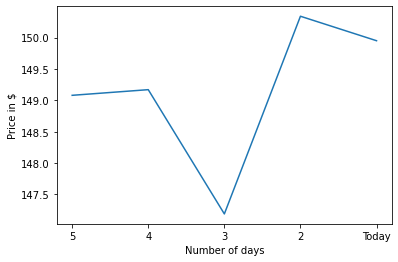

In [10]:
day5 = data7['chart']['result'][0]['indicators']['quote'][0]['high'][4]
day4 = data7['chart']['result'][0]['indicators']['quote'][0]['high'][3]
day3 = data7['chart']['result'][0]['indicators']['quote'][0]['high'][2]
day2 = data7['chart']['result'][0]['indicators']['quote'][0]['high'][1]
today = data7['chart']['result'][0]['indicators']['quote'][0]['high'][0]

plt.plot(["5","4","3","2","Today"],[day5, day4, day3, day2, today])
plt.xlabel("Number of days")
plt.ylabel("Price in $")
plt.show()